<center> <img src = "https://images.theconversation.com/files/442675/original/file-20220126-17-1i0g402.jpg" style = "height:420px; width:960px; opacity: 1"/><center/>

# <center> Exploratory analysis of meteorological data <center/>

In this notebook, we display some practical data visualization techniques for analysing weather data. The dataset used in this example consists of measurements of several weather instruments, captured every 10 minutes, from the weather station of the **Max-Planck-Institute for Biogeochemistry in Jena, Germany in 2020**, and can be accessed with the following [**link**]( https://paperswithcode.com/dataset/weather-ltsf). For further details of the measured variables in the dataset, one should refer to the [**Documentation**](https://www.bgc-jena.mpg.de/wetter/Weatherstation.pdf) issued by the Max-Plank-Institude.

The notebook is structured as following:
- [Ridge Plot](#ridge)
- [Boxplot and Swarm Plot](#bspl)
- [Line Plot](#line)

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import  LinearSegmentedColormap

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
path = "../Data/"
filename = "Max_Planck_Institute_weather_dataset_2020.csv"
data = pd.read_csv(path + filename)

In [3]:
# Define functions for data processing
def filter_column_name(column_name): # removes everything within the parenthesis
    try:
        idx = column_name.index("(") - 1
        return column_name[:idx]
        
    except ValueError: # the string doesn't contain any parenthesis
        return column_name

In [4]:
# Process dataset
columns = [filter_column_name(x) for x in data.columns]
data.rename(columns={x:y for x, y in zip(data.columns, columns)}, inplace=True)
data['date'] = data.date.apply(pd.to_datetime)
data['month'] = data.date.dt.month.values
data['day'] = data.date.dt.day.values
data['day_nb'] = data.date.dt.dayofyear.values
data.drop(52695, inplace=True)

<a id="ridge"></a>
## Ridge Plot

In [5]:
def display_ridge_plot(data, category, hour, minute, second=[0], day=list(range(1, 32)), month=list(range(1, 13)), year=[2020], label="", title=""):
    # Data processing
    data = data[data.date.apply(lambda x: (x.year in year) and (x.month in month) and (x.day in day) and (x.hour in hour) and (x.minute in minute)\
                               and (x.second in second))]
    data['month'] = data.date.apply(lambda x: x.month)
    mean_cat_map = data[[category, 'month']].groupby('month')[category].mean()
    data[f"mean_{category}_month"] = data['month'].map(mean_cat_map)
    
    # Plot
    palette = sns.color_palette(palette='coolwarm', n_colors=12)
    months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 
          10: 'October', 11: 'November', 12: 'December'}

    grid = sns.FacetGrid(data, row='month', hue=f"mean_{category}_month", aspect=15, height=0.5, palette=palette)
    grid.map(sns.kdeplot, category, bw_adjust=1, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    grid.map(sns.kdeplot, category, bw_adjust=1, clip_on=False, color="w", lw=2)
    grid.map(plt.axhline, y=0, lw=2, clip_on=False)
    
    list_months = [months[x] for x in data.month.unique()]
    for i, ax in enumerate(grid.axes.flat):
        ax.text(0, 0.02, list_months[i], fontweight='bold', fontsize=10, color=ax.lines[-1].get_color(), transform=ax.transAxes)
        
    # Show overlaps by hidding ax backgrounds
        ax.patch.set_alpha(0)
        
    grid.fig.subplots_adjust(hspace=-0.3) 
    grid.despine(bottom=True, left=True)
    grid.set_titles("")
    grid.set(yticks=[], ylabel="")
    grid.set_axis_labels(label, "", fontweight='bold', fontsize=10)
    plt.setp(ax.get_xticklabels(), fontsize=10, fontweight='bold') # tick labels
    
    grid.fig.suptitle(title, fontsize=10, fontweight=20)
    plt.show()

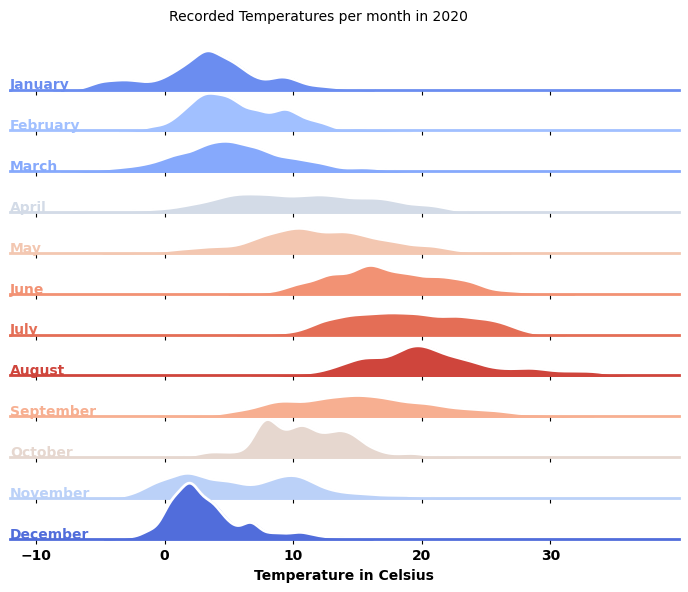

CPU times: total: 1.86 s
Wall time: 3.32 s


In [6]:
%%time
hour = list(range(24))
minute = list(range(60))
title = "Recorded Temperatures per month in 2020"
label = "Temperature in Celsius"
args = dict(hour=hour, minute=minute, title=title, label=label)

display_ridge_plot(data, 'T', **args)

<a id="bspl"></a>
## Boxplot and Swarm plot

In [7]:
# Set style parameters
rc = {"grid.color": ".6", "grid.linestyle": "dotted"}
sns.set_style("darkgrid", rc=rc)

In [8]:
def display_box_plot(data, category, hour, minute, second=[0], day=list(range(1, 32)), month=list(range(1, 13)), year=[2020], label="", title="", ax=None):
     # Data processing
    data = data[data.date.apply(lambda x: (x.year in year) and (x.month in month) and (x.day in day) and (x.hour in hour) and (x.minute in minute)\
                               and (x.second in second))]
    data['month'] = data.date.apply(lambda x: x.month)
    mean_cat_map = data[[category, 'month']].groupby('month')[category].mean()
    data[f"mean_{category}_month"] = data['month'].map(mean_cat_map)
    
    # Plot
    palette = sns.color_palette(palette='coolwarm', n_colors=12)
    months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 
          10: 'October', 11: 'November', 12: 'December'}

    sns.boxplot(data, x='month', y=category, ax=ax, boxprops={"alpha": 0.6}).set(title=title)
    sns.swarmplot(data, x='month', y=category, alpha=1, marker='.', ax=ax, hue='month', palette='husl', legend=None)
    
    plt.show() if ax is None else None

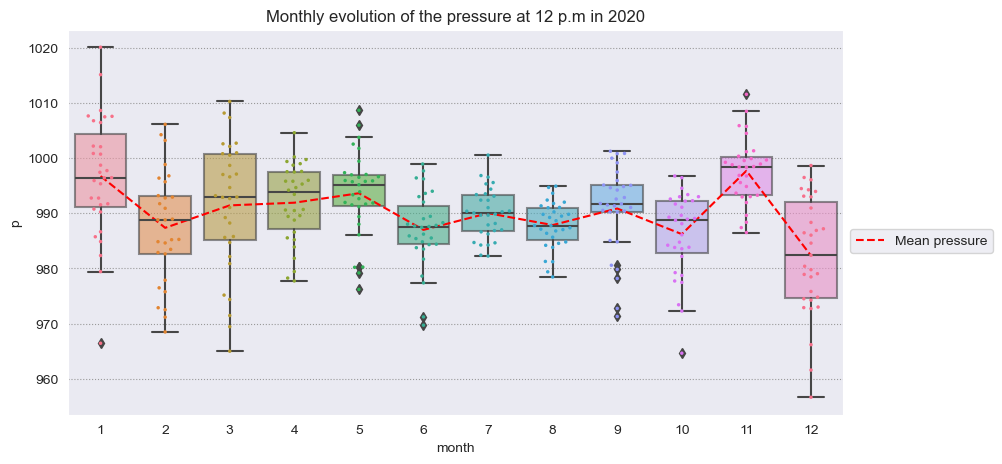

CPU times: total: 266 ms
Wall time: 781 ms


In [9]:
%%time
_, ax = plt.subplots(figsize=(10, 5))

hour = [12]
minute = [0]
title = "Monthly evolution of the pressure at 12 p.m in 2020"
args = dict(hour=hour, minute=minute, title=title, label=label)

display_box_plot(data, 'p', ax=ax, **args)

# Adding mean pressure line
ax.plot(np.arange(12), data[data.date.apply(lambda x: x.hour == 12 and x.minute == 0)].groupby(['month'])['p'].mean(), color='red', \
       linestyle='dashed', label='Mean pressure')

ax.legend(bbox_to_anchor=(1, 0.5))
plt.show()

<a id="line"></a>
## Line Plot

In [10]:
acummulated_rain_map = data[['rain', 'day_nb']].groupby('day_nb')['rain'].sum()
data['acc_rain'] = data['day_nb'].map(acummulated_rain_map)

In [72]:
def line_plot(x, y, title="", labels=["", ""], ax=None, t_labels=None, xticks=None, rotation=60):
    if ax is None:
        _, ax = plt.subplots(figsize=(16, 5))

    ax.plot(x, y, linewidth=1.25)
    ax.fill(x, y, color='navy', alpha=.45)
    ax.set_xticks(ticks=xticks, labels=t_labels, rotation=rotation) if (t_labels is not None and xticks is not None) else None
    ax.set_title(title, fontsize=14, fontweight=15)
    ax.set_xlabel(labels[0], fontsize=12)
    ax.set_ylabel(labels[1])
    
    plt.show() if ax is None else None

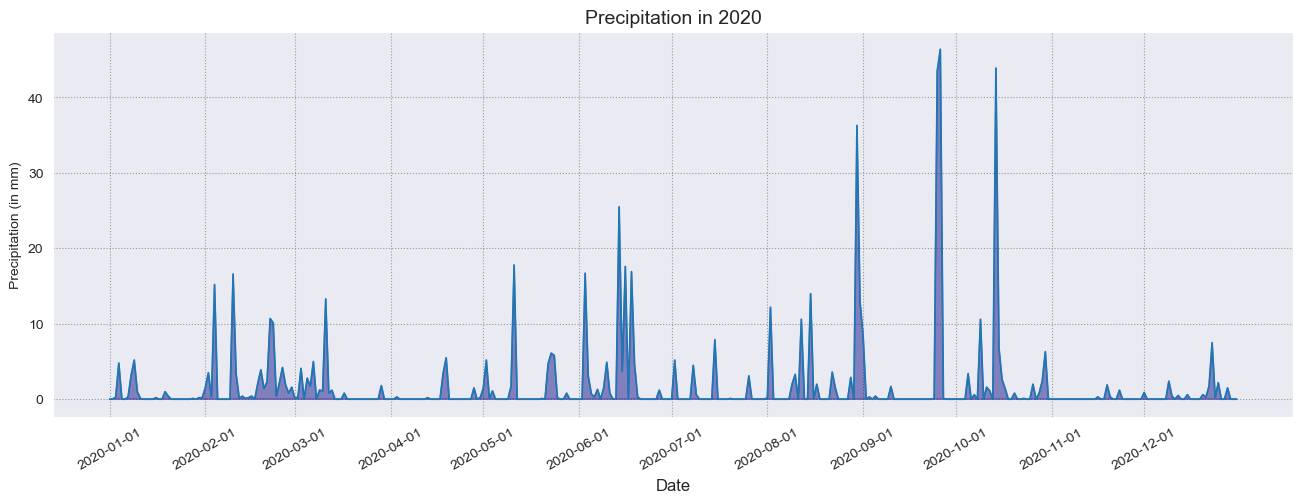

In [76]:
x = data.drop_duplicates(['day_nb', 'acc_rain']).date.dt.date.values
y = data.drop_duplicates(['day_nb', 'acc_rain']).acc_rain.values
xlab = [date for date in x if date.day == 1] # tick labels

args = dict(xticks=xlab, t_labels=xlab, title="Precipitation in 2020",
           labels=["Date", "Precipitation (in mm)"], rotation=30)

line_plot(x, y, **args)